In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse

from scipy.stats import shapiro
import matplotlib
#matplotlib.rc('axes', unicode_minus = False)
matplotlib.rc('font', family = 'Malgun Gothic')

In [181]:
df = pd.read_csv("new_card_spending.csv", parse_dates = ["사용일자"])
df_card = pd.read_csv("Card_Data_1(20210904_220136).csv", encoding='euc-kr')
df_card = df_card.rename(columns={'Card_ID' : '사용카드'})
df = pd.merge(df,df_card, on='사용카드')
df.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,연령대,요일,Unnamed: 0,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,40대,일,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0
1,2018-04-21,종로구,창신3동,종로구 창신3동,의료기관,남성,42,38,129,82,40대,토,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0
2,2018-04-24,종로구,혜화동,종로구 혜화동,자동차정비,여성,67,2,57,82,60대,화,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0
3,2018-05-02,종로구,"종로5,6가동","종로구 종로5,6가동",음료식품,여성,35,3,53,82,30대,수,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0
4,2018-05-04,노원구,상계8동,노원구 상계8동,서적문구,여성,77,29,6,82,70대,금,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187321 entries, 0 to 187320
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   사용일자        187321 non-null  datetime64[ns]
 1   지역          187321 non-null  object        
 2   소비처         187321 non-null  object        
 3   주소          187321 non-null  object        
 4   소비처업종       187321 non-null  object        
 5   성별          187321 non-null  object        
 6   연령          187321 non-null  int64         
 7   사용횟수        187321 non-null  int64         
 8   사용금액        187321 non-null  int64         
 9   사용카드        187321 non-null  int64         
 10  연령대         187321 non-null  object        
 11  요일          187321 non-null  object        
 12  Unnamed: 0  187321 non-null  int64         
 13  분류          187321 non-null  object        
 14  혜택분야        187321 non-null  object        
 15  소개          187321 non-null  object        
 16  연회

In [151]:
df.drop(['소개', '옵션', '카드명', 'Unnamed: 0', '가족카드여부', '연령', '사용일자'], axis=1, inplace=True)

In [129]:
# card = df.groupby(['혜택분야'],as_index=False).agg({'사용카드': lambda x : ','.join(x.unique()), '사용금액' : 'sum'})

In [130]:
# card_1 = card[card['혜택분야']=='comm'].reset_index()['사용카드'].tolist()
# card_2 = card[card['혜택분야']=='culture'].reset_index()['사용카드'].tolist()
# card_3 = card[card['혜택분야']=='finance'].reset_index()['사용카드'].tolist()
# card_4 = card[card['혜택분야']=='food'].reset_index()['사용카드'].tolist()
# card_5 = card[card['혜택분야']=='life'].reset_index()['사용카드'].tolist()
# card_6 = card[card['혜택분야']=='oil'].reset_index()['사용카드'].tolist()
# card_7 = card[card['혜택분야']=='onlineShopping'].reset_index()['사용카드'].tolist()
# card_8 = card[card['혜택분야']=='public'].reset_index()['사용카드'].tolist()
# card_9 = card[card['혜택분야']=='travel'].reset_index()['사용카드'].tolist()

In [131]:
df['혜택분야'].value_counts()

shopping          34342
life              26361
comm              25407
food              23556
oil               18280
culture           15936
onlineShopping    15293
travel            13253
public            11555
finance            3338
Name: 혜택분야, dtype: int64

In [146]:
df = df.dropna().reset_index()

In [133]:
# card_num = []
# for i in range(len(df)):
#     if df['혜택분야'][i] == 'comm':
#         card_num.append('1')
#     if df['혜택분야'][i] == 'culture':
#         card_num.append('2')
#     if df['혜택분야'][i] == 'finance':
#         card_num.append('3')
#     if df['혜택분야'][i] =='food':
#         card_num.append('4')
#     if df['혜택분야'][i] == 'life':
#         card_num.append('5')
#     if df['혜택분야'][i] =='oil':
#         card_num.append('6')
#     if df['혜택분야'][i] == 'onlineShopping':
#         card_num.append('7')
#     if df['혜택분야'][i] == 'public':
#         card_num.append('8')
#     if df['혜택분야'][i] == 'travel':
#         card_num.append('9')
#     if df['혜택분야'][i] == 'shopping':
#         card_num.append('10')
# df['card_num'] = card_num

In [134]:
# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split, GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix
import os
# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# sklearn.tree의 export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# 만약 그래프비즈가 안되면...
from sklearn.tree import plot_tree
# 명목형 변수 목록

In [135]:
obj_cols = df.select_dtypes("object").columns
num_cols = df.select_dtypes(exclude="object").columns

In [140]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [152]:
df.head()

,지역,소비처,주소,소비처업종,성별,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,연회비
0,노원구,상계2동,노원구 상계2동,자동차정비,여성,3,56,82,40대,일,체크카드,public,없음
1,종로구,창신3동,종로구 창신3동,의료기관,남성,38,129,82,40대,토,체크카드,public,없음
2,종로구,혜화동,종로구 혜화동,자동차정비,여성,2,57,82,60대,화,체크카드,public,없음
3,종로구,"종로5,6가동","종로구 종로5,6가동",음료식품,여성,3,53,82,30대,수,체크카드,public,없음
4,노원구,상계8동,노원구 상계8동,서적문구,여성,29,6,82,70대,금,체크카드,public,없음


In [174]:
df_class = df[['사용횟수', '사용금액','혜택분야']]

In [175]:
df_dummy = pd.get_dummies(df_class)

In [176]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_dummy)
    
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error" : clus_error})
ds_error

,NumberofCluster,Error
0,1,7.501035e+12
1,2,2.776244e+12
2,3,1.437268e+12
3,4,8.335554e+11
4,5,5.588018e+11
5,6,3.968578e+11
6,7,2.963894e+11
7,8,2.314058e+11
8,9,1.792882e+11
9,10,1.435388e+11


Text(0, 0.5, 'Sum of squared distance')

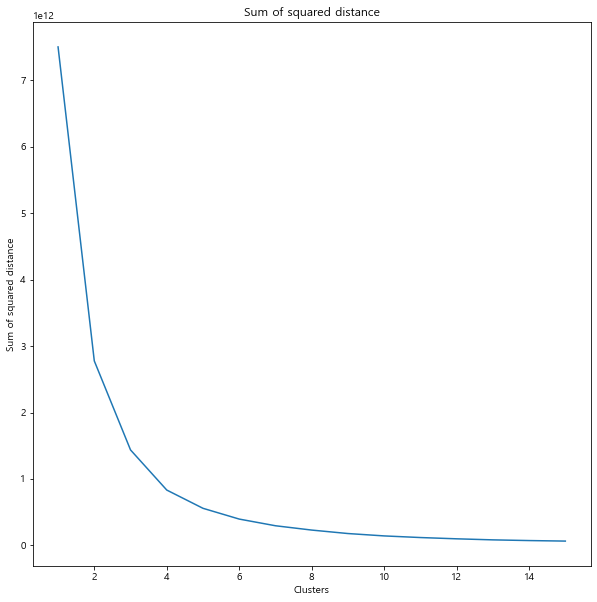

In [177]:
plt.figure(figsize = (10, 10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [178]:
clus = KMeans(4)
clus.fit(df_dummy)
cluster_kmeans = [i+1 for i in clus.labels_]
df_dummy["ClusterKmeans"] = cluster_kmeans
df_dummy.head()

,사용횟수,사용금액,혜택분야_comm,혜택분야_culture,혜택분야_finance,혜택분야_food,혜택분야_life,혜택분야_oil,혜택분야_onlineShopping,혜택분야_public,혜택분야_shopping,혜택분야_travel,ClusterKmeans
0,3,56,0,0,0,0,0,0,0,1,0,0,1
1,38,129,0,0,0,0,0,0,0,1,0,0,1
2,2,57,0,0,0,0,0,0,0,1,0,0,1
3,3,53,0,0,0,0,0,0,0,1,0,0,1
4,29,6,0,0,0,0,0,0,0,1,0,0,1


In [185]:
ds_summary_km = df_dummy.groupby("ClusterKmeans").agg(["count"])
levels0 = ds_summary_km.columns.get_level_values(0)
levels1 = ds_summary_km.columns.get_level_values(1)

ds_summary_km.columns = levels0 + "_" + levels1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,사용횟수_count,사용금액_count,혜택분야_comm_count,혜택분야_culture_count,혜택분야_finance_count,혜택분야_food_count,혜택분야_life_count,혜택분야_oil_count,혜택분야_onlineShopping_count,혜택분야_public_count,혜택분야_shopping_count,혜택분야_travel_count
0,1,176099,176099,176099,176099,176099,176099,176099,176099,176099,176099,176099,176099
1,2,1887,1887,1887,1887,1887,1887,1887,1887,1887,1887,1887,1887
2,3,395,395,395,395,395,395,395,395,395,395,395,395
3,4,8940,8940,8940,8940,8940,8940,8940,8940,8940,8940,8940,8940


In [183]:
df['ClusterMeans'] = cluster_kmeans

In [184]:
df.head()

,사용일자,지역,소비처,주소,소비처업종,성별,연령,사용횟수,사용금액,사용카드,...,요일,Unnamed: 0,분류,혜택분야,소개,연회비,옵션,카드명,가족카드여부,ClusterMeans
0,2018-04-01,노원구,상계2동,노원구 상계2동,자동차정비,여성,42,3,56,82,...,일,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0,1
1,2018-04-21,종로구,창신3동,종로구 창신3동,의료기관,남성,42,38,129,82,...,토,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0,1
2,2018-04-24,종로구,혜화동,종로구 혜화동,자동차정비,여성,67,2,57,82,...,화,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0,1
3,2018-05-02,종로구,"종로5,6가동","종로구 종로5,6가동",음료식품,여성,35,3,53,82,...,수,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0,1
4,2018-05-04,노원구,상계8동,노원구 상계8동,서적문구,여성,77,29,6,82,...,금,82,체크카드,public,내게 꼭 필요한 생활서비스 이용 시 학자금 대출 상환 포인트 적립 학자금 대출 부담...,없음,"후불교통가능, IC기능 탑재, 가족카드 발급 불가",내미래 S카드 S20 체크,0,1
